In [1]:
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [2]:
sign_mnist_df = pd.read_csv('sign_mnist_train.csv')
sign_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
sign_mnist_df.shape

(27455, 785)

In [4]:
sign_mnist_df=sign_mnist_df.sample(frac=0.3).reset_index(drop=True)
sign_mnist_df.shape

(8236, 785)

In [5]:
features = sign_mnist_df.drop(['label'],axis=1)
target = sign_mnist_df['label']

In [6]:
features.shape

(8236, 784)

In [7]:
target.shape

(8236,)

In [8]:
features = features.values.reshape(len(features), 28, 28)
features.shape

(8236, 28, 28)

In [9]:
from sklearn.model_selection import train_test_split
features = features.astype(np.float32) / 255
train_images, test_images, train_labels, test_labels = train_test_split(features,
                                                                        target,
                                                                        test_size=0.2)

In [10]:
train_images.shape

(6588, 28, 28)

In [11]:
test_images.shape

(1648, 28, 28)

## Building stacked encoder

In [12]:
stacked_encoder = tf.keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu")
])

## Building stacked decoder

In [13]:
stacked_decoder = tf.keras.models.Sequential([
    layers.Dense(128, activation="relu", input_shape=[64]),
    layers.Dense(256, activation="relu"),
    layers.Dense(28 * 28, activation="relu"),                               
    layers.Reshape([28, 28])
])

## Building autoencoder (encoder & decoder)

In [14]:
ae_model = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

In [15]:
ae_model.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.RMSprop(), 
                 metrics=['mse'])

## Training autoencoder

In [16]:
training_hist = ae_model.fit(train_images, 
                             train_images, 
                             epochs=300)

Epoch 1/300


206/206 [==============================] - 2s 7ms/step - loss: 0.1737 - mse: 0.1737
Epoch 2/300
206/206 [==============================] - 1s 7ms/step - loss: 0.1598 - mse: 0.1598
Epoch 3/300
206/206 [==============================] - 2s 7ms/step - loss: 0.1490 - mse: 0.1490
Epoch 4/300
206/206 [==============================] - 2s 8ms/step - loss: 0.1354 - mse: 0.1354
Epoch 5/300
206/206 [==============================] - 2s 8ms/step - loss: 0.1226 - mse: 0.1226
Epoch 6/300
206/206 [==============================] - 2s 8ms/step - loss: 0.1118 - mse: 0.1118
Epoch 7/300
206/206 [==============================] - 2s 7ms/step - loss: 0.1037 - mse: 0.1037
Epoch 8/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0990 - mse: 0.0990
Epoch 9/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0947 - mse: 0.0947
Epoch 10/300
206/206 [==============================] - 2s 8ms/step - loss: 0.0916 - mse: 0.0916
Epoch 11/300
206/206 [===============

206/206 [==============================] - 2s 8ms/step - loss: 0.0329 - mse: 0.0329
Epoch 81/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0329 - mse: 0.0329
Epoch 82/300
206/206 [==============================] - 2s 7ms/step - loss: 0.0325 - mse: 0.0325
Epoch 83/300
206/206 [==============================] - 1s 6ms/step - loss: 0.0323 - mse: 0.0323
Epoch 84/300
206/206 [==============================] - 1s 6ms/step - loss: 0.0319 - mse: 0.0319
Epoch 85/300
206/206 [==============================] - 1s 5ms/step - loss: 0.0312 - mse: 0.0312
Epoch 86/300
206/206 [==============================] - 1s 6ms/step - loss: 0.0312 - mse: 0.0312
Epoch 87/300
206/206 [==============================] - 1s 6ms/step - loss: 0.0311 - mse: 0.0311
Epoch 88/300
206/206 [==============================] - 1s 6ms/step - loss: 0.0311 - mse: 0.0311
Epoch 89/300
206/206 [==============================] - 1s 6ms/step - loss: 0.0310 - mse: 0.0310
Epoch 90/300
206/206 [=====================

206/206 [==============================] - 2s 8ms/step - loss: 0.0218 - mse: 0.0218
Epoch 164/300
206/206 [==============================] - 2s 7ms/step - loss: 0.0213 - mse: 0.0213
Epoch 165/300
206/206 [==============================] - 2s 8ms/step - loss: 0.0211 - mse: 0.0211
Epoch 166/300
206/206 [==============================] - 2s 8ms/step - loss: 0.0211 - mse: 0.0211
Epoch 167/300
206/206 [==============================] - 2s 8ms/step - loss: 0.0211 - mse: 0.0211
Epoch 168/300
206/206 [==============================] - 2s 8ms/step - loss: 0.0207 - mse: 0.0207
Epoch 169/300
206/206 [==============================] - 2s 7ms/step - loss: 0.0205 - mse: 0.0205
Epoch 170/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0205 - mse: 0.0205
Epoch 171/300
206/206 [==============================] - 2s 8ms/step - loss: 0.0205 - mse: 0.0205
Epoch 172/300
206/206 [==============================] - 2s 8ms/step - loss: 0.0205 - mse: 0.0205
Epoch 173/300
206/206 [===========

206/206 [==============================] - 2s 8ms/step - loss: 0.0172 - mse: 0.0172
Epoch 247/300
206/206 [==============================] - 2s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 248/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 249/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 250/300
206/206 [==============================] - 2s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 251/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 252/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 253/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 254/300
206/206 [==============================] - 2s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 255/300
206/206 [==============================] - 1s 7ms/step - loss: 0.0172 - mse: 0.0172
Epoch 256/300
206/206 [===========

## Reconstructing image

In [17]:
def reconstruct_img(model, images, n_imgs):
    random_int = randint(0, images.shape[0] - n_imgs)
    reconstructions = model.predict(images[random_int : random_int + n_imgs])
    fig = plt.figure(figsize=(n_imgs * 3, 3))
    for img_index in range(n_imgs):
        plt.subplot(2, n_imgs, 1 + img_index)
        plt.imshow(images[random_int + img_index])
        plt.subplot(2, n_imgs, 1 + n_imgs + img_index)
        plt.imshow(reconstructions[img_index])

1/1 [==============================] - 0s 131ms/step


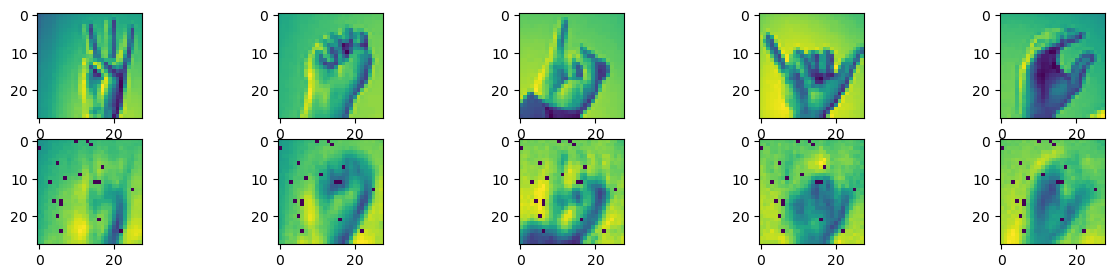

In [18]:
reconstruct_img(ae_model, test_images, 5)

1/1 [==============================] - 0s 40ms/step


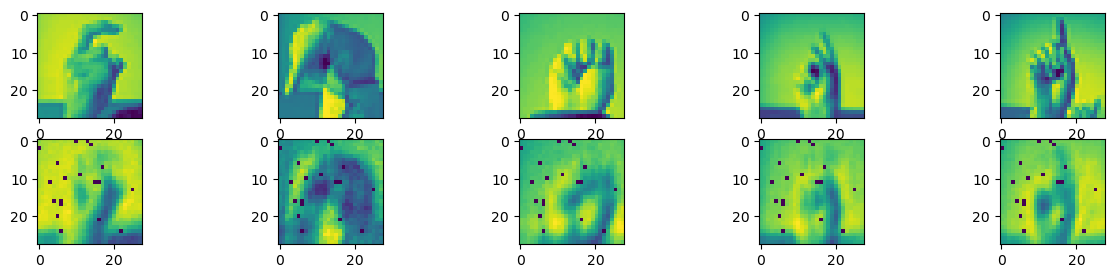

In [19]:
reconstruct_img(ae_model, test_images, 5)

## Building autoencoder using Convolutional layers

In [20]:
conv_encoder = tf.keras.models.Sequential([
    layers.Reshape([28, 28, 1], input_shape=[28, 28]),      
    layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(128, kernel_size=3, padding="SAME", activation="relu"),
    layers.MaxPool2D(pool_size=2)
])

In [21]:
conv_decoder = tf.keras.models.Sequential([
    layers.Conv2DTranspose(64, kernel_size=3, strides=2, 
                           padding="VALID", activation="relu",
                           input_shape=[3, 3, 128]),
    layers.Dropout(0.25), #to prevent overfitting
    layers.Conv2DTranspose(32, kernel_size=3, strides=2, 
                           padding="SAME", activation="relu"),
    layers.Dropout(0.25),
    layers.Conv2DTranspose(1, kernel_size=3, strides=2, 
                           padding="SAME", activation="sigmoid"),
    layers.Reshape([28, 28])
])

In [22]:
conv_ae_model = tf.keras.models.Sequential([conv_encoder, conv_decoder])

In [23]:
conv_ae_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [38]:
training_hist_convAE = conv_ae_model.fit(train_images, train_images, epochs=10, verbose=False)
#we ran it multiple times (total number of epochs>10)

1/1 [==============================] - 0s 31ms/step


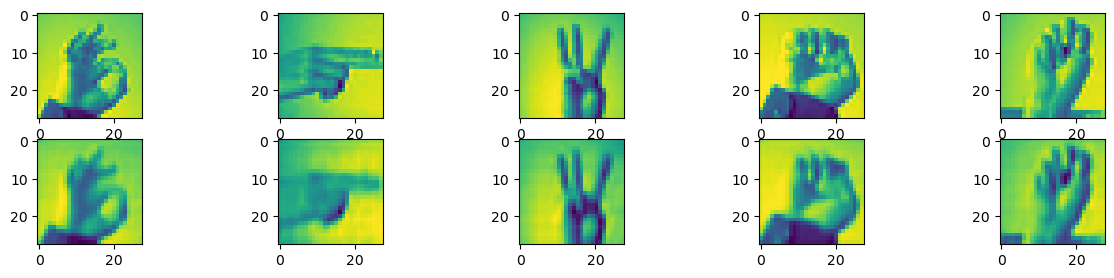

In [41]:
reconstruct_img(conv_ae_model, test_images, 5)

1/1 [==============================] - 0s 32ms/step


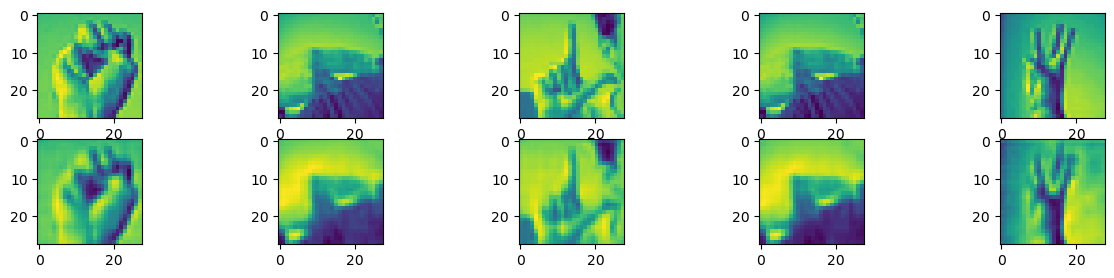

In [42]:
reconstruct_img(conv_ae_model, test_images, 5)